# LDDS

# Tutorial 1: Continuous 1DoF systems 

In this very first tutorial, we will introduce the basic setups for computation and visualization of the Lagrangian descriptor for the dynamics of 1DoF continuous dynamical systems: autonomous and nonautonomous (time-dependent).

First, we will look at the Hamilton centre system, a well-known autonomous system, enumerating every step.

Then, additional examples of other Hamiltonian systems are added to reinforce the logic and for you to play around with them!

## A first example: Hamilton centre system

In this first example, we look at the centre system: a Hamiltonian autnomous system described by the following Hamiltonian function, identified as the energy of the system, and its vector field given by Hamilton's equations of motion.

_Energy_

\begin{equation*}
H(x, p_x) = \frac{\omega}{2} (p_x^2 + x^2) \;, \;\; \omega > 0
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = \omega p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = -\omega x
 \end{align*}
 
The origin of this system is a stable equilibrium point, which unlike other example systems provided in `ldds` does not have stable and unstable invariant manifolds.

<span style="color:blue"><b>FIRST</b></span>

We begin by importing the basic functions from the `ldds` module to calculate and plot the Lagrangian descriptors (LDs) of the dynamics of the system, and also the function that define its vector field.

In [2]:
from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
from ldds.vector_fields import HamCenter1D

> __NOTE__  When running this notebook, if you haven't installed `ldds` then, you might get an import error from Python. Try out the following lines to fix that, restart the notebook, and then try importing the above functions again. 

In [1]:
import os, sys
import numpy as np
sys.path.insert(1, os.pardir)

<span style="color:blue"><b>SECOND</b></span>

Define the paramaters for a 2D rectangular grid for visualization of the Lagrangian descriptor in the plane $x-p_x$, from which initial conditions to solve the dynamics are taken too. 

In [3]:
x_min,x_max = [-1.6, 1.6] # x axis limits
y_min,y_max = [-1.6, 1.6] # p_x axis limits
Nx, Ny = [100, 100] # Number of points per axis

grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

> __NOTE__ We recomend starting calculations with a coarse grid first to prevent overloading your computer, for example: `Nx, Ny = [100,100]` or less, and subsequently increasing the resolution or recentering the grid.

<span style="color:blue"><b>THIRD</b></span>

Define the paramaters for integration of the dynamics: the integration time, $\tau$, and the $p$-value, determining the deifnition of the Lagrangian descriptor function to use.

In [4]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.5

> __NOTE__ For further info on different versions of the Lagrangian descriptor function. Look at this online reference. [Here](https://champsproject.github.io/lagrangian_descriptors/content/chapter3.html#formulations-for-lagrangian-descriptors).

<span style="color:blue"><b>FOURTH</b></span>

Define the vector field function describing the dynamics.

In [5]:
vector_field = HamCenter1D

LDDS provides a thorough description of every vector field function, which can be displayed using `help`.

In [6]:
help(HamCenter1D)

Help on function HamCenter1D in module ldds.vector_fields:

HamCenter1D(t, u, PARAMETERS=[1])
    Returns vector field for a 1DoF centre at time t, for an array of points in phase space.
    Number of model parameters: 1 . PARAMETERS = [omega]
    Functional form: v = (omega*y, - omega*x), with u = (x, y)
    
    Parameters
    ----------
    t : float
        Time. (This vector field is independent of time.)
    
    u : ndarray, shape(n,)
        Points in phase space.
    
    PARAMETERS : list of floats
        Vector field parameters.
    
    Returns
    -------
    v : ndarray, shape(n,)
        Vector field at points u and time t.



This is particularly helpful if you want to change `PARAMETERS` of the system, which can be done constructing `vector_field` from `HamCenter1D` as below

In [7]:
my_omega_value = 1
vector_field = lambda t, u : HamCenter1D(t, u, PARAMETERS=[my_omega_value])

> __NOTE__ 
> Here, we imported the function `HamCenter1D` that lives in the module `ldds.vector_fields`.
> LDDS can also accept user-defined functions, as it will be seen later in [Tutorial 4](tutorial-4.ipynb)

<span style="color:blue"><b>FIFTH</b></span>

Compute the forward and backward Lagrangian descriptors passing all the above parameters to `compute_lagrangian_descriptor`. 

Note that for the _backwards LD_ the integration time is passed with a negative sign, since the dynamics has to be solved "backwards in time" for this LD.

In [8]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

<span style="color:blue"><b>SIXTH</b></span>

Visualise the Lagrangian descriptor and its gradient using the `draw_all_lds` function. 

This will return two contour plots, one of LD values and another of its gradient magnitude over each point in the 2D grid that we defined initially.

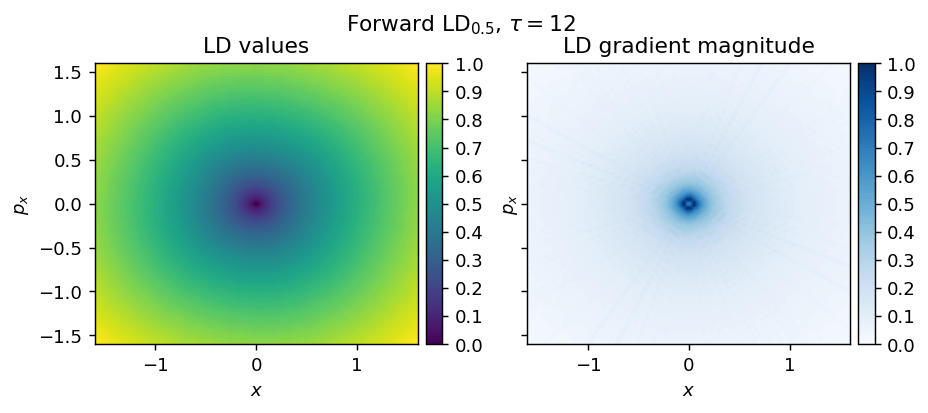

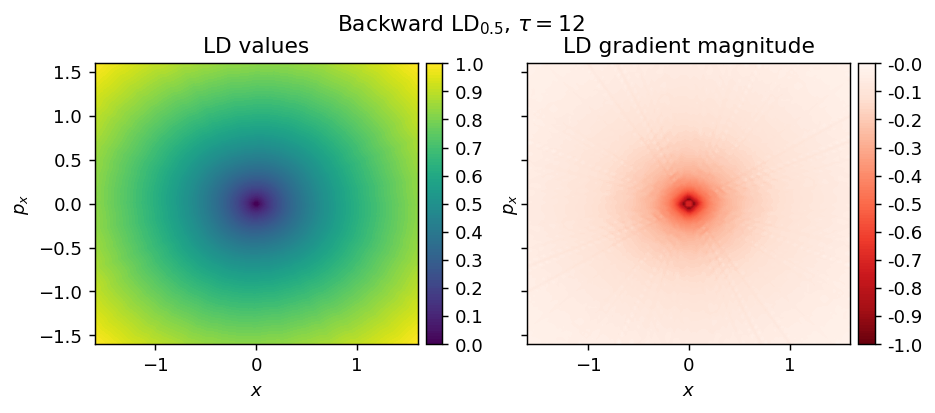

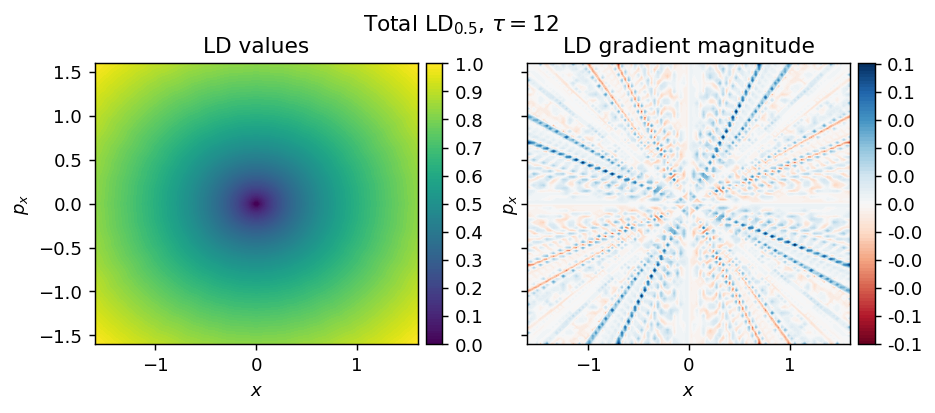

In [9]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

<span style="color:blue"><b>SEVENTH</b></span> (OPTIONAL)

The graphical output provided by `draw_all_lds` can be further modified, since it returns the plot handles of the figure. So, typical modifications to Python `matplotlib` objects apply. 

Below we show how the first row of plots can be customised from the outputted subplot handles.

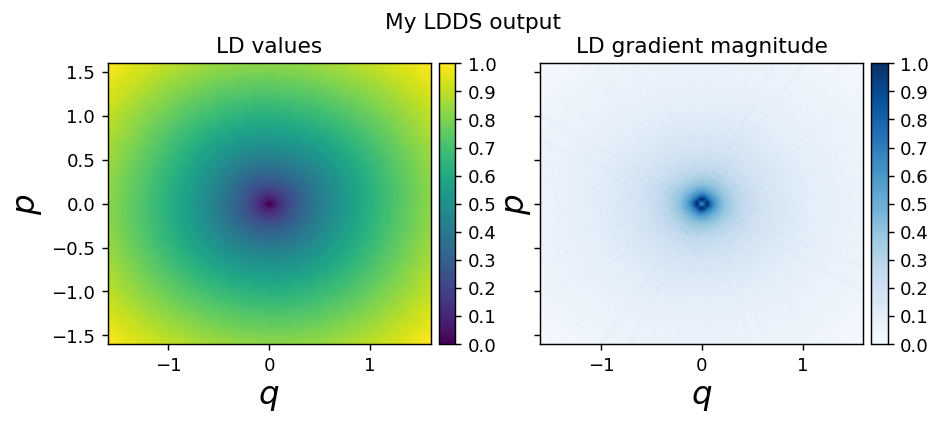

In [10]:
# choose LD forwards subplots
fig, ax = figs[0]

# set new axes labels
ax[0].set_xlabel(r"$q$", fontsize=18)
ax[0].set_ylabel(r"$p$", fontsize=18)
ax[1].set_xlabel(r"$q$", fontsize=18)
ax[1].set_ylabel(r"$p$", fontsize=18)

# set new super-title
suptitle = "My LDDS output"
fig.suptitle(suptitle)

# visualise
fig

## More autonomous systems

Next, we introduce extra examples of computation of LDs for other autonomous and nonautonomous dynamical systems.

For simplification we just present the executable cells with all the necessary input parameters and variables.

Feel free to change all the different parameters as an exercise to see their influence on the graphical output of the LDs.

### Hamilton Saddle

_Energy_

\begin{equation*}
H(x, p_x) = \frac{\lambda}{2}( p_x^2 -  x^2 ) \; , \;\; \lambda > 0
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = \lambda p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = \lambda x
 \end{align*}

In [11]:
from ldds.vector_fields import HamSaddle1D

In [12]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.5

# Mesh parameters
x_min,x_max = [-1.6, 1.6]
y_min,y_max = [-1.6, 1.6]
Nx, Ny = [100, 100]

In [13]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
vector_field = HamSaddle1D

In [14]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

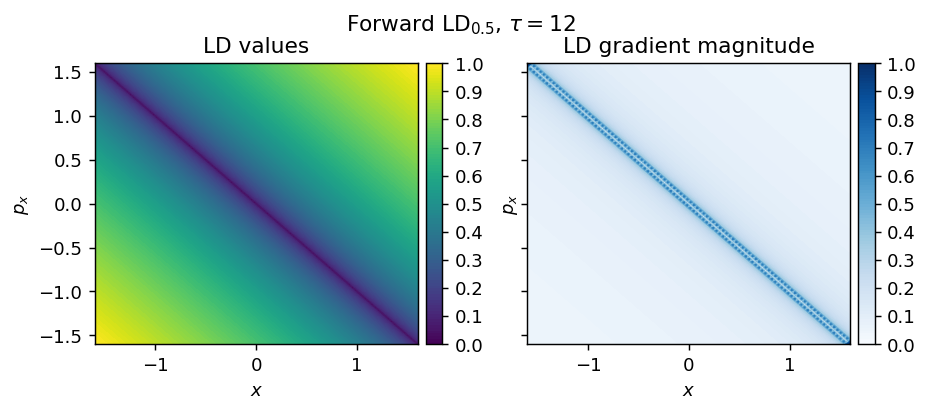

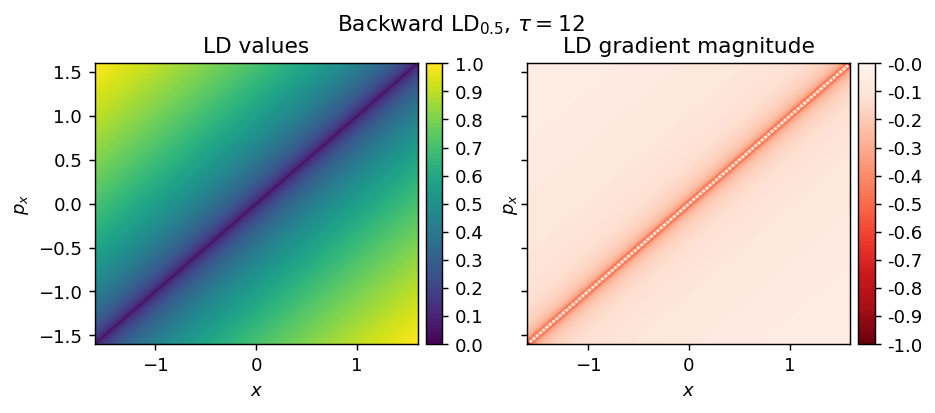

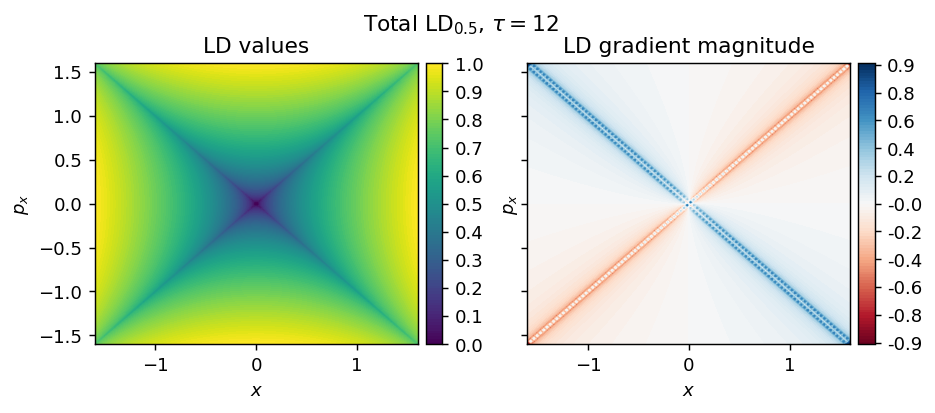

In [15]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Duffing oscillator

_Energy_

\begin{equation*}
H(x, p_x) = \dfrac{1}{2}p_x^2 - \dfrac{1}{2}x^2 + \dfrac{1}{4}x^4
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = x - x^3
 \end{align*}

In [16]:
from ldds.vector_fields import Duffing1D

In [17]:
# Integration parameters
tau = 12

# LDp, p-value
p_value = 0.5

# Mesh parameters
x_min,x_max = [-1.6, 1.6]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

In [18]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
vector_field = Duffing1D

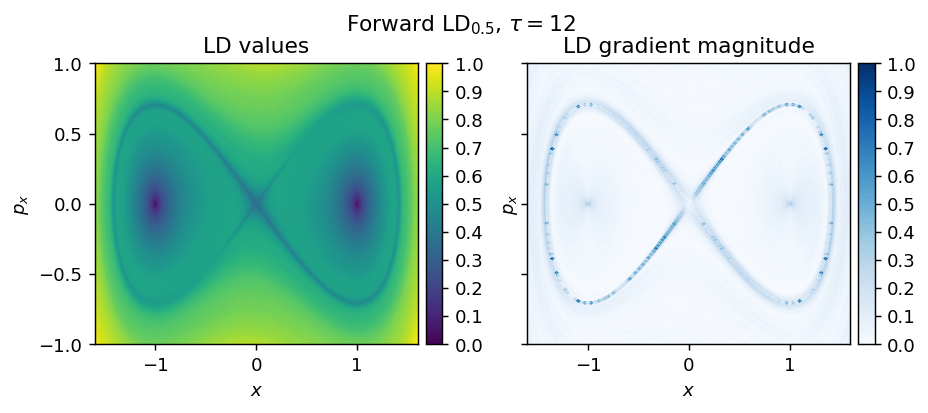

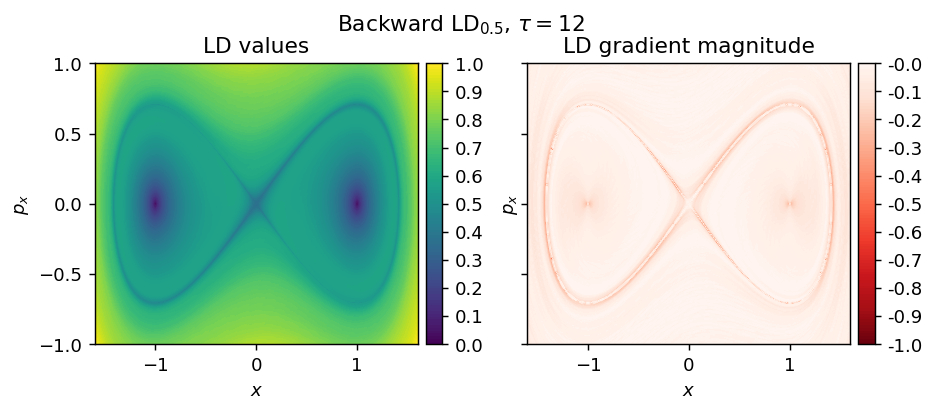

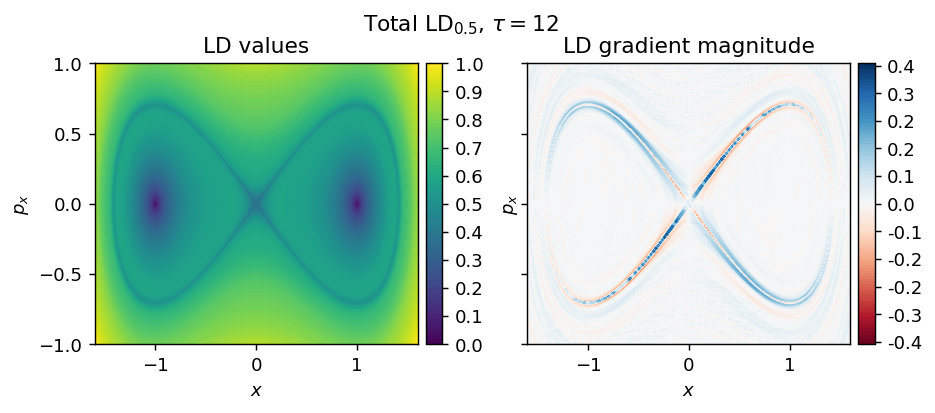

In [19]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

## Working with nonautonomous systems

For nonautnomous dynamical systems their vector field is time-dependent.

Since the Lagrangian descriptor is a function of the initial conditions of trajectories at time `t0`, then if `t0` changes, then computed LD values will change too.

By default, LDDS assumes `t0 = 0`, however, this can be easily changed as we will see later.

__NEXT__, we introduce a basic example of a 2D nonautonomous system: _The Double Gyre_. 

For this example, the steps to set up the computation of the LDs follow as before. The only fundamental difference is the definition of the vector field, which must be a time-dependent Python function. 

### Double-gyre ($t_0 = 0$)

_Vector field_

\begin{align*}
 \dot{x} &= -\pi A sin(\pi f(t, x)/s) cos(\pi y / s) - \mu x \\
 \dot{y} &=  \pi A cos(\pi f(t, x)/s) sin(\pi y / s) \frac{df(t,x)}{dx} - \mu y
\end{align*}
 
where
 
\begin{align*}
    f(t, x)    &= \epsilon \cdot sin(\phi t + \psi) x^2 + (1 - 2 \epsilon \cdot sin(\phi t + \psi)) x \\
    \frac{df(t,x)}{dx} &= 2 \epsilon \cdot sin(\phi t + \psi) x + (1 - 2 \epsilon \cdot sin(\phi t + \psi))
\end{align*}

with $A, \phi, \psi, \mu, s, \epsilon$ constant parameters.

In [20]:
from ldds.vector_fields import DoubleGyre

In [21]:
vector_field = DoubleGyre

In [22]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [300, 300]

In [23]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [24]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

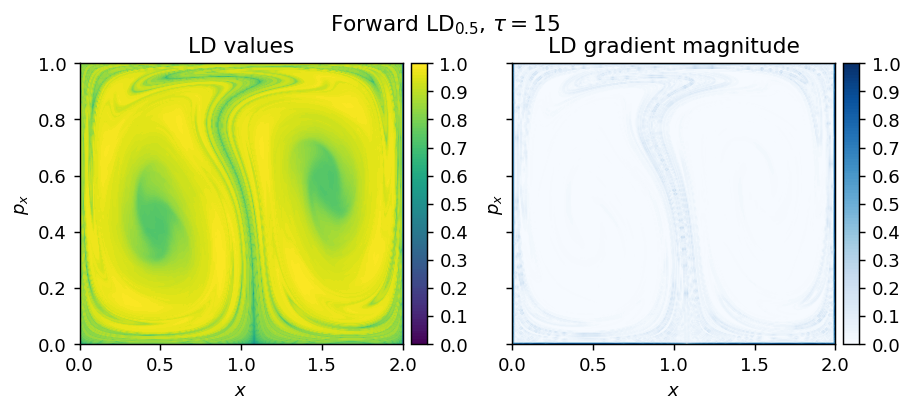

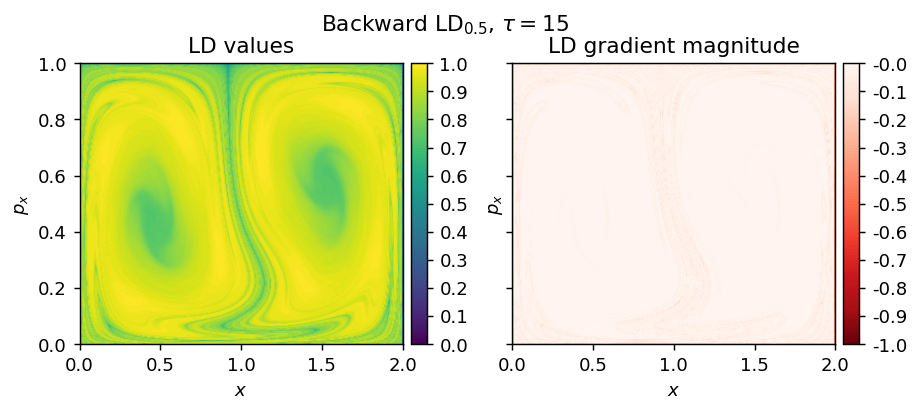

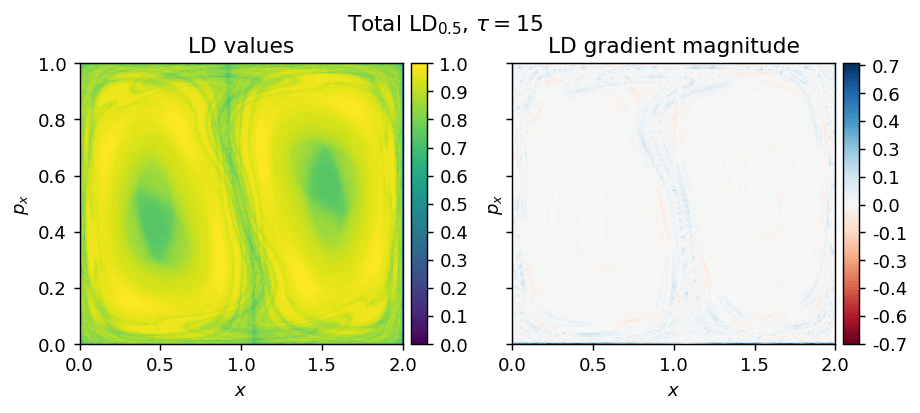

In [25]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

### Double-gyre ($t_0 \neq 0$)

As mentioned above, LDDS takes `t0 = 0` by default.

However, this can be changes via the parameter called `phase_shift`, which is set as equal to zero by default, as seen using Python help.

In general, `phase_shift` appear for any time-dependent vector field in the `vector_fields` module.

In [26]:
help(DoubleGyre)

Help on function DoubleGyre in module ldds.vector_fields:

DoubleGyre(t, u, PARAMETERS=[0, 0.25, 6.283185307179586, 0, 0, 1, 0.25])
    Returns 2D Double Gyre vector field at time t, for an array of points in phase space.
    Number of model parameters: 6 . PARAMETERS = [phase_shift, A, phi, psi, mu, s, epsilon]
    Functional form: 
    
    vx = -pi*A*sin(pi*f(t + phase_shift, x)/s)*cos(pi*y/s) - mu*x
    vy =  pi*A*cos(pi*f(t + phase_shift, x)/s)*sin(pi*y/s)*df(t + phase_shift,x)/dx - mu*y
    
    with
    
    f(t, x)    = epsilon*sin(phi*t + psi)*x**2 + (1 - 2*epsilon*sin(phi*t + psi))*x
    df/dx(t,x) = 2*epsilon*sin(phi*t + psi)*x + (1 - 2*epsilon*sin(phi*t + psi))
    u = (x, y)
    Parameters
    ----------
    t : float
        fixed time-point of vector field, for all points in phase space.
    u : array_like, shape(n,)
        points in phase space to determine vector field at time t.
    PARAMETERS : list of floats
        vector field parameters
    Returns
    -------
 

To change `phase_shift` we need the redefine the `PARAMETERS` of the `DoubleGyre` vector field, as below

In [27]:
phase_shift = 0.5
vector_field = lambda t, u: DoubleGyre(t, u, PARAMETERS=[phase_shift, 0.25, 2*np.pi, 0, 0, 1, 0.25])

Then, all the remaining steps of the set up are done as before

In [28]:
# Integration parameters
tau = 15

# LDp, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [300, 300]

In [29]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

In [30]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

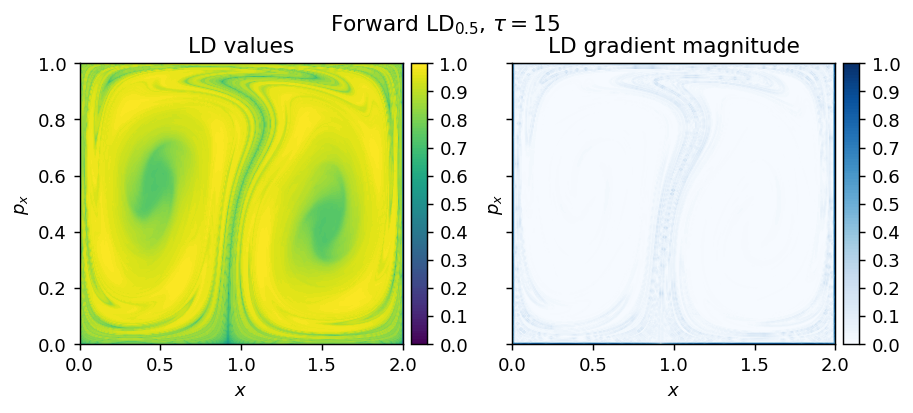

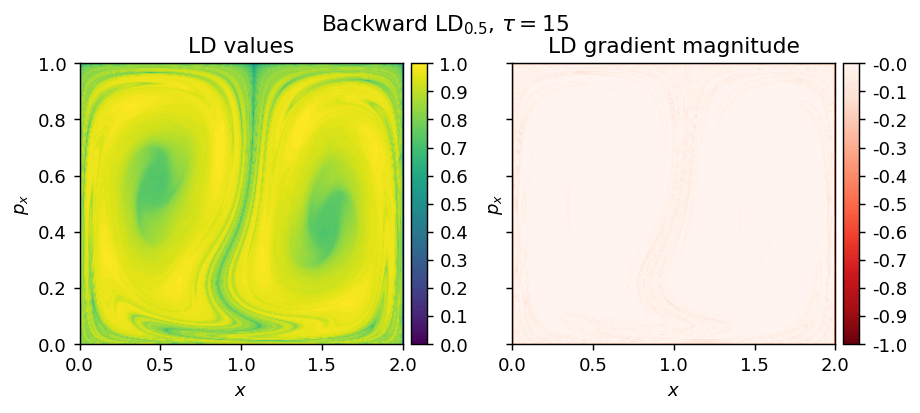

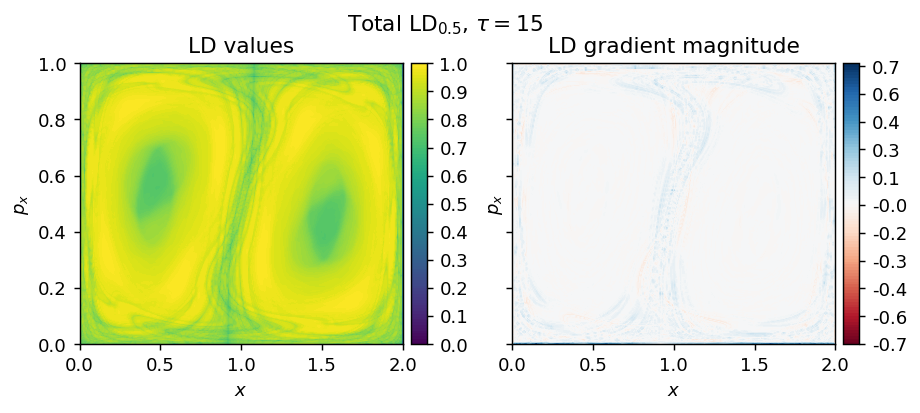

In [31]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

See the difference between the above output and the one generated using default parameters (when `phase_shift = 0`).